# Why We Require Evaluation Metrics?

Most beginners and practitioners most of the time do not bother about the model performance. The talk is about building a well-generalized model, Machine learning model cannot have 100 per cent efficiency otherwise the model is known as a biased model, which further includes the concept of overfitting and underfitting.

It is necessary to obtain the accuracy on training data, But it is also important to get a genuine and approximate result on unseen data otherwise Model is of no use.

So to build and deploy a generalized model we require to Evaluate the model on different regression model evaluation metrics. These metrics helps us to better optimize the performance, fine-tune it, and obtain a better result.

If one metric is perfect, there is no need for multiple metrics. To understand the benefits and disadvantages of regression evaluation metrics for regression because different evaluation metric fits on a different set of a dataset.

### Imports

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

### Dataset

In [38]:
cgpa = [6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09]
package = [3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6, 2.48, 2.31]
df = pd.DataFrame({'cgpa' : cgpa, 'package' : package})
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31


In [39]:
y = df['package']
X = df.drop('package', axis = 1)

In [40]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# if random_state is not added, then the split will be different every time.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
# resultant_df = pd.DataFrame({'Input': X_test, 'Actual' : y_test, 'Predicted' : y_pred})
# the above code is incorrect as I was trying to assign a pandas series (x_test, y_test) and a numpy array as  values directly in a dictionary for pd.Dataframe().
# Combine the components properly using pd.concat or by ensuring all components are Series or columns:
resultant_df = pd.DataFrame({
    'Input': X_test['cgpa'].values,
    'Actual': y_test.values,
    'Predicted': y_pred
})

resultant_df

# OR

# resultant_df = pd.concat(
#     [X_test.reset_index(drop=True),
#      y_test.reset_index(drop=True),
#      pd.Series(y_pred, name='Predicted')],
#     axis=1
# )

# resultant_df

,Input,Actual,Predicted
0,6.75,2.48,2.935135
1,5.12,1.98,2.223827


### 📐 Regression Evaluation Metrics

#### 1. **Mean Absolute Error (MAE)**

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

* Measures the average magnitude of errors in a set of predictions, without considering their direction.

Advantages of MAE

    - The MAE you get is in the same unit as the output variable.
    - It is most Robust to outliers.

Disadvantages of MAE

    - The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.


In [41]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.34948076878599355




#### 2. **Mean Squared Error (MSE)**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* Penalizes larger errors more than MAE due to the squaring of differences.

Advantages of MSE

    - The graph of MSE is differentiable, so you can easily use it as a loss function.

Disadvantages of MSE

    - The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared.
    - If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

In [42]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.13329961457468248


#### 3. **Root Mean Squared Error (RMSE)**

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

* Same as MSE, but in the same units as the target variable.

Advantages of RMSE

     - The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

Disadvantages of RMSE

    - It is not that robust to outliers as compared to MAE.

In [43]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
# print("RMSE",(mean_squared_error(y_test,y_pred, squared=False)))

RMSE 0.36510219743885747


#### 4. **R-squared (R²) – Coefficient of Determination**

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

* Indicates the proportion of variance in the dependent variable that is predictable from the independent variable(s).
* Values range from 0 to 1 (sometimes negative if the model is worse than the mean).

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-1.1327938331949197


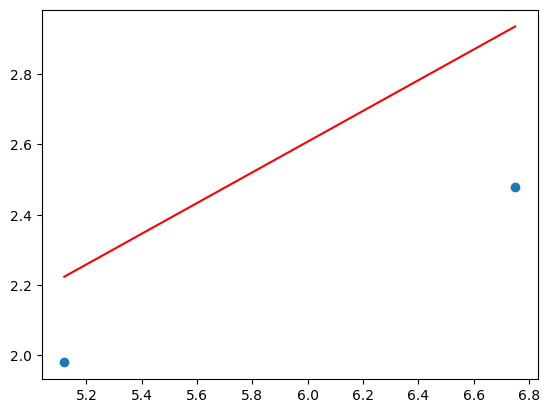

In [45]:
# plot data and regression line
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

This explains the terrible R2 score